# 기본 스태킹 모델
* 기본 스태킹 모델을 위스콘신 암 데이터세트에 적용

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier  # KN근접
from sklearn.ensemble import RandomForestClassifier  # 랜덤포레스트
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

# 한글폰트 설치
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = path).get_name()
rc('font', family = font_name)

# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size = .2, random_state = 0)

## 개별 ML모델 생성

In [3]:
knn_clf = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators = 100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C = 10)

## 개별모델 학습

In [4]:
clf_list = [knn_clf, rf_clf, dt_clf, ada_clf]
accuracy = []
pred = []
result = {}
for cls in clf_list:
    cls.fit(X_train, y_train)
    Y_pred = cls.predict(X_test)
    accuracy.append(np.round(accuracy_score(y_test, Y_pred) * 100, 2))
    pred.append(Y_pred)
result['Classifier'] = ['KNN', 'RDF','DST', 'ADA']
result['Accuracy'] = accuracy
result['Prediction'] = pred

acc_df = pd.DataFrame(result)

In [5]:
acc_df

,Classifier,Accuracy,Prediction
0,KNN,92.11,"[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, ..."
1,RDF,96.49,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, ..."
2,DST,91.23,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, ..."
3,ADA,95.61,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ..."


In [6]:
result.get("Prediction")

[array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 

In [7]:
pred = np.array(result.get("Prediction"))
print(pred.shape)

#transpose를 이용해 행과 열의 위치 교환.칼럼 레빌로 각 알고리즘의 예측 결과를 피처로 변환
pred = np.transpose(pred)
print(pred.shape)
pred

(4, 114)
(114, 4)


array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1,

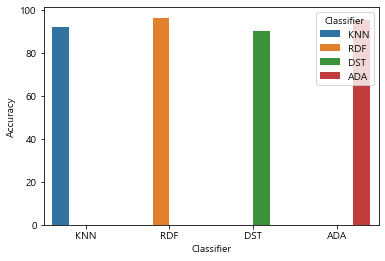

In [29]:
sns.barplot(x = 'Classifier', y = 'Accuracy', hue = 'Classifier', data = acc_df)

## 최종 메타모델인 로지스틱회귀 수행

In [30]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)
print("최종 메타 모델의 예측 정확도 : {0:.4f}".format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도 : 0.9737


# CV세트 기반의 스태킹
* CV세트 기반의 스태킹 모델은 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터세트를 만들때 교차검증 기반으로 예측된 결과 데이터 세트를 이용

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데ㅣ터를생성하기 위한 함수 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    """
    개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를생성하기 위한 함수 
    """
    #지정된 n_folds값으로 KFold 생성
    kf = KFold(n_splits = n_folds,shuffle = False, random_state = 0)
    
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파일 배열 초기화
    train_fold_pred = np.zeros(shape=(X_train_n.shape[0], 1))
    test_pred = np.zeros(shape = (X_test_n.shape[0], n_folds))
    
    print(model.__class__.__name__, "모델 시작")
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print("\t 폴드세트 :", folder_counter, "시작")
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1, 1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터 , test_pred_mean는 테스트 데이터 
    return train_fold_pred, test_pred_mean

## 메타모델이 사용할 학습용, 테스트용 데이터세트 분리

In [35]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier 모델 시작
	 폴드세트 : 0 시작
	 폴드세트 : 1 시작
	 폴드세트 : 2 시작
	 폴드세트 : 3 시작
	 폴드세트 : 4 시작
	 폴드세트 : 5 시작
	 폴드세트 : 6 시작
RandomForestClassifier 모델 시작
	 폴드세트 : 0 시작
	 폴드세트 : 1 시작
	 폴드세트 : 2 시작
	 폴드세트 : 3 시작
	 폴드세트 : 4 시작
	 폴드세트 : 5 시작
	 폴드세트 : 6 시작
DecisionTreeClassifier 모델 시작
	 폴드세트 : 0 시작
	 폴드세트 : 1 시작
	 폴드세트 : 2 시작
	 폴드세트 : 3 시작
	 폴드세트 : 4 시작
	 폴드세트 : 5 시작
	 폴드세트 : 6 시작
AdaBoostClassifier 모델 시작
	 폴드세트 : 0 시작
	 폴드세트 : 1 시작
	 폴드세트 : 2 시작
	 폴드세트 : 3 시작
	 폴드세트 : 4 시작
	 폴드세트 : 5 시작
	 폴드세트 : 6 시작


In [36]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis = 1)
Stack_final_X_test  = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis = 1)

print("원본 학습 피처 데이터 Shape : ", X_train.shape, '원본 테스트 피처 Shape : ', X_test.shape)
print("스태킹 학습 피처 데이터 Shape : ", X_train.shape, '스태킹 학습 피처 Shape : ', Stack_final_X_train.shape)
print("스태킹 테스트 피처 데이터 Shape : ", X_train.shape,\
      '스태킹 테스트 피처 데이터 Shape : ', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape :  (455, 30) 원본 테스트 피처 Shape :  (114, 30)
스태킹 학습 피처 데이터 Shape :  (455, 30) 스태킹 학습 피처 Shape :  (455, 4)
스태킹 테스트 피처 데이터 Shape :  (455, 30) 스태킹 테스트 피처 데이터 Shape :  (114, 4)


## 최종 메타 모델인 로지스틱 회귀를 스태킹 데이터세트로 학습 및 예측 수행

In [37]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print("최종 메타모델의 예측 정확도 : {0:.4f}".format(accuracy_score(y_test, stack_final)))

최종 메타모델의 예측 정확도 : 0.9737


## 정리

* 스태킹은 여러 개의 모델들이 생성한 예측 데이터를 기반으로 최종 메타모델이 학습할 별도의 학습 데이터 세트와 예측할 데이터세트를 재생성하는 기법
* 스태킹모델의 핵심은 메타 모델이 사용할 학습 데이터세트와 예측 데이터세트를 개별 모델의 예측 값들을 스태킹형태로 결합해 생성하는데 있다.